In [1]:
from datetime import datetime, timedelta
from pathlib import Path
import logging
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import random
%load_ext autoreload
%autoreload 2

In [10]:
if not (Path.cwd()/'gamesession.py').exists():  
    print('changing cwd')  
    os.chdir('..')
    Path.cwd()

from gamesession import GameSession

In [11]:
session = GameSession()

6 cast members: Etienne, Grace, Haili, Knick, Xu, Yirong

26 games
 - A Date with Me
 - Add-on fairy tale
 - Chain Death
 - Da Doo Rap Rap
 - Double Reverse Alphabet
 - Emotion Roller Coaster
 - Everyone Dies
 - Forward Reverse
 - Genres
 - Irish drinking song
 - Last Comic Standing
 - Mutant Debate
 - Emotional Floorplan
 - One Three Five
 - Pillars
 - Props
 - Puppets
 - Questions Only
 - Sit, Stand, Lie
 - Story, Story, Die!
 - Stunt Doubles
 - Suitcase
 - Sure Ding
 - TV Box
 - Two lines
 - World's Worst


In [131]:
df_g = pd.DataFrame(columns=sorted([f"{g.category}-{g.name}" for g in session.games]))
df_c = pd.DataFrame(columns=session.game_categories)
print(session.game_categories)
print(list(df_g.columns))

for i in range(1,3000):
    session.create_game_sequence()
    # Distribution of shuffled categories position in list
    df_c = pd.concat([df_c, pd.DataFrame({cat:session.shuffled_categories.index(cat) for cat in session.game_categories}, index=[0])], axis=0, ignore_index=True).astype(int)

    row_g = pd.DataFrame(
        {f"{session.games[idx].category}-{session.games[idx].name}":session.game_sequence.index(idx) for idx in session.game_sequence}, 
        index=[0]
        )
    df_g = pd.concat([df_g, row_g], axis=0, ignore_index=True).astype(int)

['All Play', 'Audience', 'Continuation', 'Emotion', 'Energy', 'Guessing', 'Limitation', 'Musical', 'Replay']
['All Play-A Date with Me', 'All Play-Props', 'All Play-Questions Only', 'All Play-Story, Story, Die!', "All Play-World's Worst", 'Audience-Pillars', 'Audience-Puppets', 'Continuation-Add-on fairy tale', 'Continuation-TV Box', 'Emotion-Emotion Roller Coaster', 'Emotion-Emotional Floorplan', 'Energy-Everyone Dies', 'Energy-Sit, Stand, Lie', 'Energy-Stunt Doubles', 'Energy-Sure Ding', 'Guessing-Chain Death', 'Guessing-Suitcase', 'Limitation-Double Reverse Alphabet', 'Limitation-Mutant Debate', 'Limitation-One Three Five', 'Limitation-Two lines', 'Musical-Da Doo Rap Rap', 'Musical-Irish drinking song', 'Replay-Forward Reverse', 'Replay-Genres', 'Replay-Last Comic Standing']


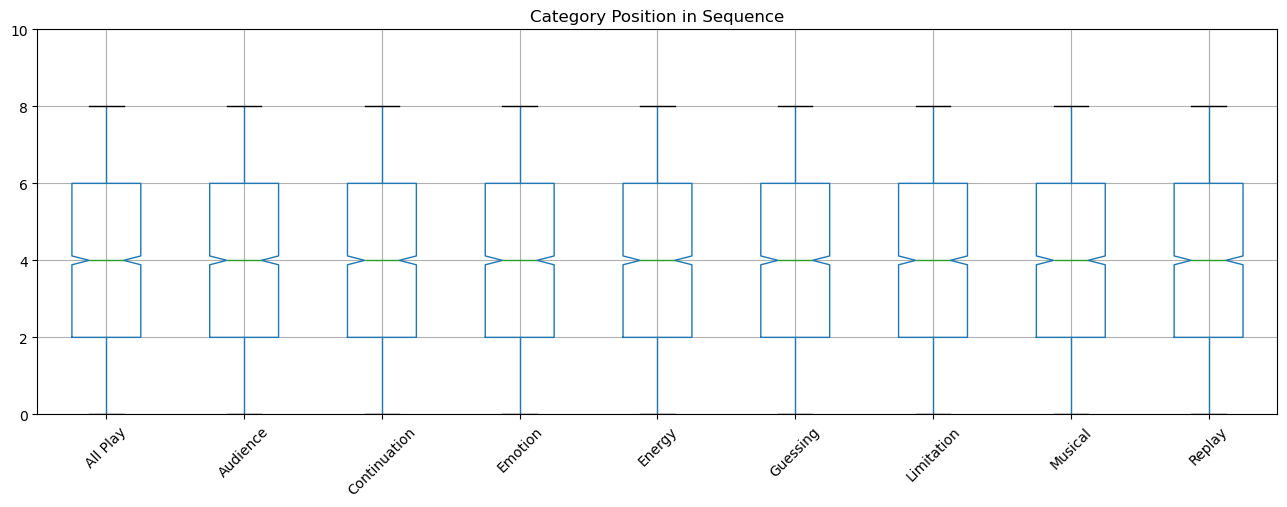

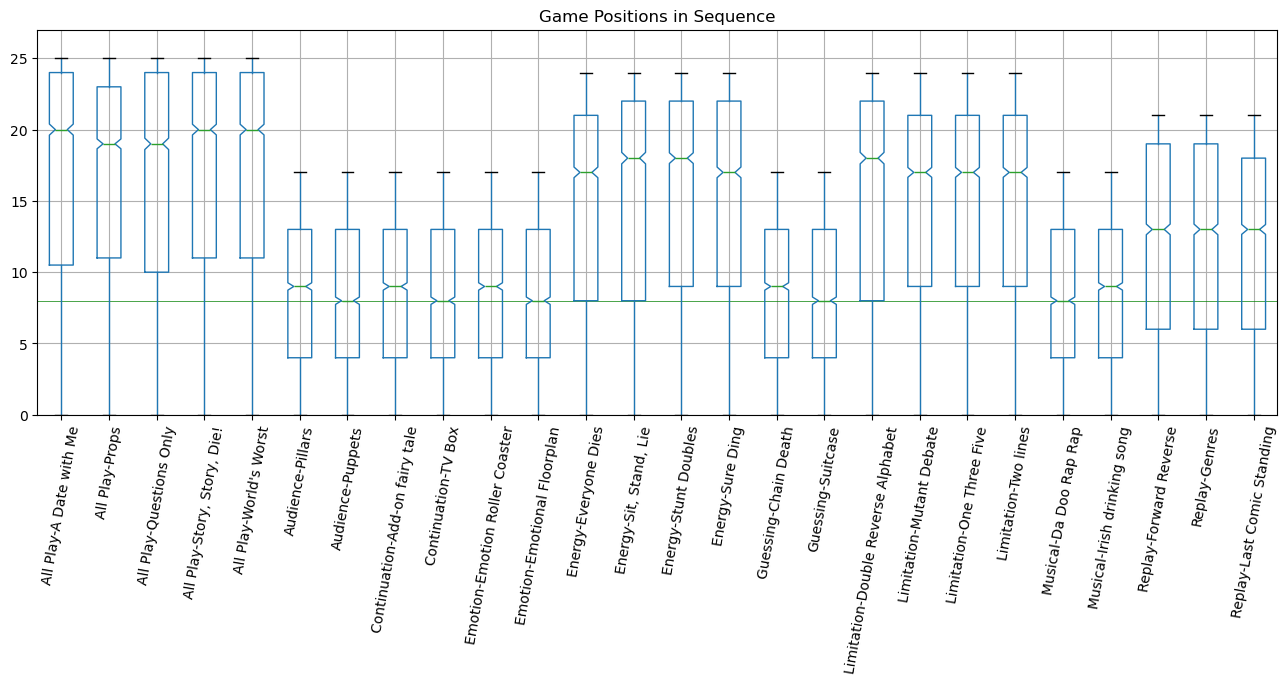

In [139]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
# df_c = df_c + 1
# df_c.mean(axis=0).plot(kind='bar', ax=ax1, title='Category Mean Positions', ylim=(0,len(session.game_categories)))
# df_c.min(axis=0).plot(kind='bar', ax=ax2, title='Category Min Positions', ylim=(0,len(session.game_categories)))
# df_c.max(axis=0).plot(kind='bar', ax=ax3, title='Category Max Positions', ylim=(0,len(session.game_categories)))
# plt.show()

# df_g = df_g + 1
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
# df_g.mean(axis=0).plot(kind='bar', ax=ax1, title='Game Mean Positions', ylim=(0,session.nbr_games))
# df_g.min(axis=0).plot(kind='bar', ax=ax2, title='Game Min Positions', ylim=(0,session.nbr_games))
# df_g.max(axis=0).plot(kind='bar', ax=ax3, title='Game Max Positions', ylim=(0,session.nbr_games))
# plt.show()

fig, ax = plt.subplots(figsize=(16,5))
# ax.hlines(y=8, xmin=0.5, xmax=len(df_g.columns)+.5, color='green', lw=0.5)
df_c.boxplot(rot=45, ax=ax, notch=True)
ax.set_title('Category Position in Sequence')
ax.set_ylim(0,len(session.game_categories) + 1)
plt.show()

fig, ax = plt.subplots(figsize=(16,5))
ax.hlines(y=8, xmin=0.5, xmax=len(df_g.columns)+.5, color='green', lw=0.5)
df_g.boxplot(rot=80, ax=ax, notch=True)
ax.set_title('Game Positions in Sequence')
ax.set_ylim(0,session.nbr_games + 1)
plt.show()

In [150]:
col_groups = [[col for col in df_g.columns if col.startswith(cat)] for cat in session.game_categories]
nb_games_played = 8
for col_group in col_groups:
    print(col_group[0].split('-')[0], ':')
    cum_frequency = 0
    for col in col_group:
        frequency = df_g.loc[df_g[col] < nb_games_played, col].shape[0]/df_g.shape[0]
        cum_frequency += frequency
        print(f" {col.split('-')[1]}: {frequency:.3f}", end=' ; ')
    print('\n', f"{'Cumulative:'} {cum_frequency:.3f}")

All Play :
 A Date with Me: 0.189 ;  Props: 0.183 ;  Questions Only: 0.182 ;  Story, Story, Die!: 0.164 ;  World's Worst: 0.175 ; 
 Cumulative: 0.894
Audience :
 Pillars: 0.445 ;  Puppets: 0.444 ; 
 Cumulative: 0.889
Continuation :
 Add: 0.439 ;  TV Box: 0.446 ; 
 Cumulative: 0.885
Emotion :
 Emotion Roller Coaster: 0.441 ;  Emotional Floorplan: 0.451 ; 
 Cumulative: 0.892
Energy :
 Everyone Dies: 0.227 ;  Sit, Stand, Lie: 0.226 ;  Stunt Doubles: 0.221 ;  Sure Ding: 0.216 ; 
 Cumulative: 0.891
Guessing :
 Chain Death: 0.434 ;  Suitcase: 0.450 ; 
 Cumulative: 0.884
Limitation :
 Double Reverse Alphabet: 0.223 ;  Mutant Debate: 0.214 ;  One Three Five: 0.224 ;  Two lines: 0.223 ; 
 Cumulative: 0.884
Musical :
 Da Doo Rap Rap: 0.444 ;  Irish drinking song: 0.444 ; 
 Cumulative: 0.888
Replay :
 Forward Reverse: 0.303 ;  Genres: 0.290 ;  Last Comic Standing: 0.299 ; 
 Cumulative: 0.892


In [163]:
col_groups = [[col for col in df_g.columns if col.startswith(cat)] for cat in session.game_categories]
for nb_games_played in range(6, 12):
    print(f"{nb_games_played} games played:")
    for col_group in col_groups:
        cum_frequency = 0
        for col in col_group:
            frequency = df_g.loc[df_g[col] < nb_games_played, col].shape[0]/df_g.shape[0]
            cum_frequency += frequency
            # print(f" {col.split('-')[1]}: {frequency:.3f}", end=' ; ')
        print(f"  {col_group[0].split('-')[0]:20s} {cum_frequency:.3f}")

6 games played:
  All Play             0.675
  Audience             0.664
  Continuation         0.662
  Emotion              0.678
  Energy               0.669
  Guessing             0.658
  Limitation           0.664
  Musical              0.652
  Replay               0.679
7 games played:
  All Play             0.784
  Audience             0.774
  Continuation         0.767
  Emotion              0.792
  Energy               0.778
  Guessing             0.781
  Limitation           0.772
  Musical              0.771
  Replay               0.781
8 games played:
  All Play             0.894
  Audience             0.889
  Continuation         0.885
  Emotion              0.892
  Energy               0.891
  Guessing             0.884
  Limitation           0.884
  Musical              0.888
  Replay               0.892
9 games played:
  All Play             1.000
  Audience             1.000
  Continuation         1.000
  Emotion              1.000
  Energy               1.000
  Guessi

In [5]:
session.game_sequence

[2,
 17,
 5,
 20,
 4,
 10,
 1,
 14,
 9,
 21,
 19,
 12,
 6,
 24,
 8,
 23,
 16,
 3,
 15,
 18,
 11,
 7,
 0,
 22,
 13,
 25]

In [6]:
l = session.game_sequence.copy()
while l:
    next_game = l.pop()
    print(next_game)
    print(l)

25
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18, 11, 7, 0, 22, 13]
13
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18, 11, 7, 0, 22]
22
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18, 11, 7, 0]
0
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18, 11, 7]
7
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18, 11]
11
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15, 18]
18
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3, 15]
15
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16, 3]
3
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23, 16]
16
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8, 23]
23
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24, 8]
8
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6, 24]
24
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12, 6]
6
[2, 17, 5, 20, 4, 10, 1, 14, 9, 21, 19, 12]
12
[2, 17, 5, 20, 4, 1